##Part 1

In [ ]:
vocab = {}
word_encoding = 1
def word_encoder(text):
  global word_encoding

  words = text.lower().split(" ")
  encoding = []

  for word in words:
    if word in vocab:
      code = vocab[word]
      encoding.append(code)
    else:
      vocab[word] = word_encoding
      encoding.append(word_encoding)
      word_encoding += 1

  return encoding

text = "I thought this is a test sentence for NLP's Word encoding process but this is not"
encoding = word_encoder(text)
print(encoding)
print(vocab)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 3, 4, 14]
{'i': 1, 'thought': 2, 'this': 3, 'is': 4, 'a': 5, 'test': 6, 'sentence': 7, 'for': 8, "nlp's": 9, 'word': 10, 'encoding': 11, 'process': 12, 'but': 13, 'not': 14}


In [ ]:
positive_review = "I thought the movie was going to be bad but it was actually amazing"
negative_review = "I thought the movie was going to be amazing but it was actually bad"


pos_encode = word_encoder(positive_review)
neg_encode = word_encoder(negative_review)

print("Positive:", pos_encode)
print("Negative:", neg_encode)

Positive: [1, 2, 15, 16, 17, 18, 19, 20, 21, 13, 22, 17, 23, 24]
Negative: [1, 2, 15, 16, 17, 18, 19, 20, 24, 13, 22, 17, 23, 21]


In [ ]:
vocab

{'i': 1,
 'thought': 2,
 'this': 3,
 'is': 4,
 'a': 5,
 'test': 6,
 'sentence': 7,
 'for': 8,
 "nlp's": 9,
 'word': 10,
 'encoding': 11,
 'process': 12,
 'but': 13,
 'not': 14,
 'the': 15,
 'movie': 16,
 'was': 17,
 'going': 18,
 'to': 19,
 'be': 20,
 'bad': 21,
 'it': 22,
 'actually': 23,
 'amazing': 24}

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog\'s is amazing?'
]

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)

#To fixed input shape
padded = tf.keras.utils.pad_sequences(sequences, maxlen=5)

print("\nPadded Sequences:")
print(padded)


# # Try with words that the tokenizer wasn't fit to
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

test_seq = tokenizer.texts_to_sequences(test_data)

print("\nTest Sequence = ", test_seq)

padded = tf.keras.utils.pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")
print(padded)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'i': 4, 'dog': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, "dog's": 10, 'is': 11, 'amazing': 12}

Sequences =  [[4, 3, 2, 5], [4, 3, 2, 7], [6, 3, 2, 5], [8, 6, 9, 2, 10, 11, 12]]

Padded Sequences:
[[ 0  4  3  2  5]
 [ 0  4  3  2  7]
 [ 0  6  3  2  5]
 [ 9  2 10 11 12]]

Test Sequence =  [[4, 1, 3, 2, 5], [2, 5, 1, 2, 1]]

Padded Test Sequence: 
[[0 0 0 0 0 4 1 3 2 5]
 [0 0 0 0 0 2 5 1 2 1]]


In [ ]:
tokenizer.sequences_to_texts(sequences)

['i love my dog',
 'i love my cat',
 'you love my dog',
 "do you think my dog's is amazing"]

##Part 2: Text Classification

In [ ]:
VOCAB_SIZE = 10000
embedding_dim = 16
MAXLEN = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json


--2025-10-04 14:30:43--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.207, 74.125.196.207, 173.194.216.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2025-10-04 14:30:43 (94.1 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json

with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [ ]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=VOCAB_SIZE, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = tf.keras.utils.pad_sequences(training_sequences, maxlen=MAXLEN, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = tf.keras.utils.pad_sequences(testing_sequences, maxlen=MAXLEN, padding=padding_type, truncating=trunc_type)

In [ ]:
testing_padded

array([[   1, 1100, 6663, ...,    0,    0,    0],
       [ 202,    1,    8, ...,    0,    0,    0],
       [  18,  380,  191, ...,    0,    0,    0],
       ...,
       [   1,    9,   67, ...,    0,    0,    0],
       [1556,  374, 4114, ...,    0,    0,    0],
       [   1, 1700,    6, ...,    0,    0,    0]], dtype=int32)

In [ ]:

# Convert numpy arrays to TensorFlow Tensors
training_padded = tf.convert_to_tensor(training_padded)
training_labels = tf.convert_to_tensor(training_labels)
testing_padded = tf.convert_to_tensor(testing_padded)
testing_labels = tf.convert_to_tensor(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, embedding_dim, input_length=MAXLEN),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 4s - 7ms/step - accuracy: 0.5699 - loss: 0.6796 - val_accuracy: 0.6186 - val_loss: 0.6507
Epoch 2/30
625/625 - 3s - 4ms/step - accuracy: 0.7357 - loss: 0.5480 - val_accuracy: 0.8158 - val_loss: 0.4564
Epoch 3/30
625/625 - 3s - 5ms/step - accuracy: 0.8213 - loss: 0.4077 - val_accuracy: 0.7858 - val_loss: 0.4360
Epoch 4/30
625/625 - 5s - 8ms/step - accuracy: 0.8451 - loss: 0.3583 - val_accuracy: 0.8389 - val_loss: 0.3753
Epoch 5/30
625/625 - 3s - 4ms/step - accuracy: 0.8709 - loss: 0.3143 - val_accuracy: 0.8475 - val_loss: 0.3575
Epoch 6/30
625/625 - 3s - 5ms/step - accuracy: 0.8767 - loss: 0.2940 - val_accuracy: 0.8527 - val_loss: 0.3486
Epoch 7/30
625/625 - 6s - 9ms/step - accuracy: 0.8954 - loss: 0.2622 - val_accuracy: 0.8547 - val_loss: 0.3424
Epoch 8/30
625/625 - 3s - 4ms/step - accuracy: 0.9001 - loss: 0.2490 - val_accuracy: 0.8180 - val_loss: 0.4084
Epoch 9/30
625/625 - 3s - 5ms/step - accuracy: 0.9091 - loss: 0.2265 - val_accuracy: 0.8486 - val_loss: 0.3478
E

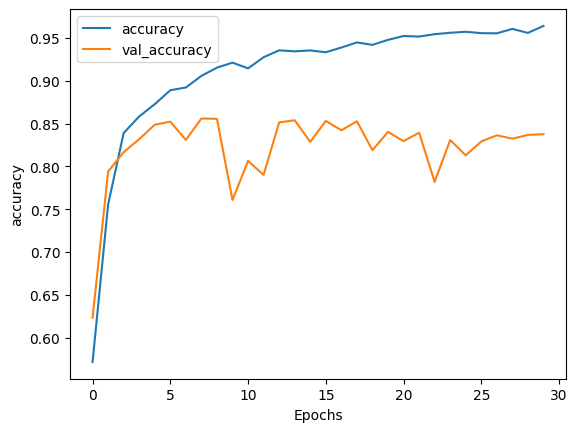

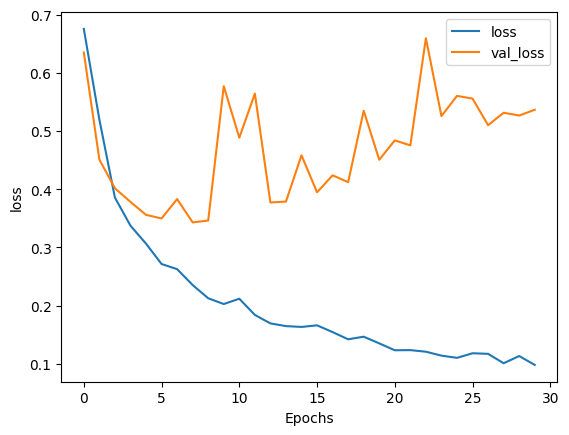

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(int(i), '?') for i in text])

print(decode_sentence(training_padded[2]))
print(training_sentences[2])
print(labels[2])

mom starting to fear son's web series closest thing she will have to grandchild ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = tf.keras.utils.pad_sequences(sequences, maxlen=MAXLEN, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
[[0.79916203]
 [0.03844962]]


##Part 3: Text Generation

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2025-10-01 13:57:53--  https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K   328KB/s    in 0.2s    

2025-10-01 13:57:54 (328 KB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(tf.keras.utils.pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

print(xs[6])
print(ys[6])
print(xs[5])
print(ys[5])

8
1
71
6
713
39
1790
1791
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
[0. 0. 0. ... 0. 0. 0.]
[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)))
model.add(tf.keras.layers.Dense(total_words, activation='softmax'))
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.0654 - loss: 6.8168
Epoch 2/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1016 - loss: 5.7390
Epoch 3/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1768 - loss: 4.6840
Epoch 4/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2790 - loss: 3.6572
Epoch 5/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3958 - loss: 2.8334
Epoch 6/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5071 - loss: 2.1807
Epoch 7/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5968 - loss: 1.7314
Epoch 8/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6484 - loss: 1.4948
Epoch 9/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6992 - loss: 1.2528
Epoch 10/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7458 - loss: 1.0477
Epoch 11/100
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7647 - loss: 0.9690
Epoch 12/100
377/377 ━━━━━━━━━━━━━━━━━━

In [ ]:
seed_text = "I've got a bad feeling about this"

next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = tf.keras.utils.pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
	print(seed_text)
print(seed_text)


[0.25,0.25,0.50]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

#Part 4: Sequence to Sequence

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import pathlib
import random
import string
import re
import numpy as np

import tensorflow as tf
import keras
from keras import layers
from keras import ops
from keras.layers import TextVectorization


##English to Spanish

In [ ]:
text_file = keras.utils.get_file(
    fname="spa-eng.zip",
    origin="http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip",
    extract=True,
    cache_dir="/content/",
)
# Construct the correct path to the extracted file
text_file = pathlib.Path(text_file).parent /"spa-eng_extracted" / "spa-eng" / "spa.txt"
print(f"Using data file: {text_file}")



with open(text_file, "r", encoding="utf8") as f:
    lines = f.read().split("\n")[:-1]
text_pairs = []
for line in lines:
    eng, spa = line.split("\t")
    spa = "[start] " + spa + " [end]"
    text_pairs.append((eng, spa))

2638744/2638744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Using data file: /content/datasets/spa-eng_extracted/spa-eng/spa.txt


In [ ]:
# --- Hyperparameters ---
VOCAB_SIZE = 15000
SEQUENCE_LENGTH = 20
BATCH_SIZE = 64
EMBED_DIM = 256
NUM_HEADS = 8
FF_DIM = 2048
NUM_LAYERS = 4





In [ ]:

# Shuffle for better training
random.shuffle(text_pairs)


# --- Split Dataset ---
num_val_samples = 2000
train_pairs = text_pairs[:-num_val_samples]
val_pairs = text_pairs[-num_val_samples:]

In [ ]:
train_pairs[:5]

[('Our soccer game will be postponed.',
  '[start] Nuestro partido de fútbol será pospuesto. [end]'),
 ('I met him on my way home.',
  '[start] Me encontré con él de camino a casa. [end]'),
 ('I talked to everybody.', '[start] Conversé con todos. [end]'),
 ("There isn't much difference between the two.",
  '[start] No hay mucha diferencia entre las dos. [end]'),
 ('I always wondered what that noise was.',
  '[start] Siempre me había preguntado qué era ese ruido. [end]')]

In [ ]:
strip_chars = string.punctuation + "¿"
strip_chars = strip_chars.replace("[", "")
strip_chars = strip_chars.replace("]", "")

def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(
        lowercase, f"[{re.escape(strip_chars)}]", ""
    )

eng_vectorization = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="int",
    output_sequence_length=SEQUENCE_LENGTH,
    standardize=custom_standardization,
)
spa_vectorization = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="int",
    output_sequence_length=SEQUENCE_LENGTH + 1, # Ensure Spanish is also padded to SEQUENCE_LENGTH
    standardize=custom_standardization,
)

train_english_texts = [pair[0] for pair in train_pairs]
train_spanish_texts = [pair[1] for pair in train_pairs]

# Adapt the vectorization layers to the training data
eng_vectorization.adapt(train_english_texts)
spa_vectorization.adapt(train_spanish_texts)


def format_dataset(eng, spa):
    eng = eng_vectorization(eng)
    spa = spa_vectorization(spa)
    return (
        {
            "encoder_inputs": eng,
            "decoder_inputs": spa[:, :-1],
        },
        spa[:, 1:],
    )


def make_dataset(pairs):
    eng_texts, spa_texts = zip(*pairs)
    eng_texts = list(eng_texts)
    spa_texts = list(spa_texts)
    dataset = tf.data.Dataset.from_tensor_slices((eng_texts, spa_texts))
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.map(format_dataset)
    return dataset.cache().shuffle(2048).prefetch(16)


train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)

In [ ]:
# To inspect a tf.data.Dataset, you need to iterate through it
for element in train_ds.take(1): # take(1) gets the first batch
    encoder_inputs, decoder_inputs = element[0]["encoder_inputs"], element[0]["decoder_inputs"]
    target_outputs = element[1]

    print("Encoder inputs shape:", encoder_inputs.shape)
    print("Decoder inputs shape:", decoder_inputs.shape)
    print("Target outputs shape:", target_outputs.shape)

Encoder inputs shape: (64, 20)
Decoder inputs shape: (64, 20)
Target outputs shape: (64, 20)


##English to Bangla

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def read_file(filepath):
    try:
        with open(filepath, 'r', encoding='utf-8') as f:
            content = f.read()
            return content
    except FileNotFoundError:
        print(f"Error: The file {filepath} was not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None


en_text = read_file("/content/drive/MyDrive/Dataset/hasan-etal-2020-low/data/corpus.train.en")
bn_text = read_file("/content/drive/MyDrive/Dataset/hasan-etal-2020-low/data/corpus.train.bn")


en_text = en_text.split("\n")
bn_text = bn_text.split("\n")


In [ ]:
text_pairs = []

for line in zip(en_text, bn_text):
    en, bn = line
    bn = "[start] " + bn + " [end]"
    text_pairs.append((en,bn))

random.shuffle(text_pairs)

num_train_samples = 30000
train_pairs = text_pairs[:num_train_samples]
val_pairs = text_pairs[num_train_samples:num_train_samples+5000]

In [ ]:
# --- Hyperparameters ---
VOCAB_SIZE = 15000
SEQUENCE_LENGTH = 100
BATCH_SIZE = 64
EMBED_DIM = 256
NUM_HEADS = 8
FF_DIM = 2048
NUM_LAYERS = 4





In [ ]:
strip_chars = string.punctuation + "¿"
strip_chars = strip_chars.replace("[", "")
strip_chars = strip_chars.replace("]", "")

def custom_standardization(input_string):
    lowercase = tf.strings.lower(input_string)
    return tf.strings.regex_replace(
        lowercase, f"[{re.escape(strip_chars)}]", ""
    )

eng_vectorization = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="int",
    output_sequence_length=SEQUENCE_LENGTH,
    standardize=custom_standardization,
)
bn_vectorization = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode="int",
    output_sequence_length=SEQUENCE_LENGTH + 1,
    standardize=custom_standardization,
)

train_english_texts = [pair[0] for pair in train_pairs]
train_bangla_texts = [pair[1] for pair in train_pairs]

# Adapt the vectorization layers to the training data
eng_vectorization.adapt(train_english_texts)
bn_vectorization.adapt(train_bangla_texts)


def format_dataset(eng, bn):
    eng = eng_vectorization(eng)
    bn = bn_vectorization(bn)
    return (
        {
            "encoder_inputs": eng,
            "decoder_inputs": bn[:, :-1],
        },
        bn[:, 1:],
    )


def make_dataset(pairs):
    eng_texts, bn_texts = zip(*pairs)
    eng_texts = list(eng_texts)
    bn_texts = list(bn_texts)
    # Convert lists to tensors before creating the dataset
    dataset = tf.data.Dataset.from_tensor_slices((tf.constant(eng_texts), tf.constant(bn_texts)))
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.map(format_dataset)
    return dataset.cache().shuffle(2048).prefetch(16)


train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)

In [ ]:
# To inspect a tf.data.Dataset, you need to iterate through it
for element in train_ds.take(1): # take(1) gets the first batch
    encoder_inputs, decoder_inputs = element[0]["encoder_inputs"], element[0]["decoder_inputs"]
    target_outputs = element[1]

    print("Encoder inputs shape:", encoder_inputs.shape)
    print("Decoder inputs shape:", decoder_inputs.shape)
    print("Target outputs shape:", target_outputs.shape)

Encoder inputs shape: (64, 100)
Decoder inputs shape: (64, 100)
Target outputs shape: (64, 100)


##Architecture

In [ ]:
import keras.ops as ops


class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = tf.keras.Sequential(
            [
                layers.Dense(dense_dim, activation="relu"),
                layers.Dense(embed_dim),
            ]
        )
        self.layernorm_1 = tf.keras.layers.LayerNormalization()
        self.layernorm_2 = tf.keras.layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, mask=None):
        if mask is not None:
            padding_mask = ops.cast(mask[:, None, :], dtype="int32")
        else:
            padding_mask = None

        attention_output = self.attention(
            query=inputs, value=inputs, key=inputs, attention_mask=padding_mask
        )
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "embed_dim": self.embed_dim,
                "dense_dim": self.dense_dim,
                "num_heads": self.num_heads,
            }
        )
        return config


class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = tf.keras.layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = tf.keras.layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, inputs):
        length = ops.shape(inputs)[-1]
        positions = ops.arange(0, length, 1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return ops.not_equal(inputs, 0)

    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "sequence_length": self.sequence_length,
                "vocab_size": self.vocab_size,
                "embed_dim": self.embed_dim,
            }
        )
        return config


class TransformerDecoder(tf.keras.layers.Layer):
    def __init__(self, embed_dim, latent_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.latent_dim = latent_dim
        self.num_heads = num_heads
        self.attention_1 = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.attention_2 = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = tf.keras.Sequential(
            [
                tf.keras.layers.Dense(latent_dim, activation="relu"),
                tf.keras.layers.Dense(embed_dim),
            ]
        )
        self.layernorm_1 = tf.keras.layers.LayerNormalization()
        self.layernorm_2 = tf.keras.layers.LayerNormalization()
        self.layernorm_3 = tf.keras.layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, mask=None):
        inputs, encoder_outputs = inputs
        causal_mask = self.get_causal_attention_mask(inputs)

        if mask is None:
            inputs_padding_mask, encoder_outputs_padding_mask = None, None
        else:
            inputs_padding_mask, encoder_outputs_padding_mask = mask

        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=causal_mask,
            query_mask=inputs_padding_mask,
        )
        out_1 = self.layernorm_1(inputs + attention_output_1)

        attention_output_2 = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
            query_mask=inputs_padding_mask,
            key_mask=encoder_outputs_padding_mask,
        )
        out_2 = self.layernorm_2(out_1 + attention_output_2)

        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(out_2 + proj_output)

    def get_causal_attention_mask(self, inputs):
        input_shape = ops.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = ops.arange(sequence_length)[:, None]
        j = ops.arange(sequence_length)
        mask = ops.cast(i >= j, dtype="int32")
        mask = ops.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = ops.concatenate(
            [ops.expand_dims(batch_size, -1), ops.convert_to_tensor([1, 1])],
            axis=0,
        )
        return ops.tile(mask, mult)

    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "embed_dim": self.embed_dim,
                "latent_dim": self.latent_dim,
                "num_heads": self.num_heads,
            }
        )
        return config

In [ ]:
# Define the Transformer model for English to Bangla
encoder_inputs = tf.keras.Input(shape=(None,), dtype="int64", name="encoder_inputs")
x = PositionalEmbedding(SEQUENCE_LENGTH, eng_vectorization.vocabulary_size(), EMBED_DIM)(encoder_inputs)
encoder_outputs = TransformerEncoder(EMBED_DIM, FF_DIM, NUM_HEADS)(x)
encoder = keras.Model(encoder_inputs, encoder_outputs)

decoder_inputs = tf.keras.Input(shape=(None,), dtype="int64", name="decoder_inputs")
x = PositionalEmbedding(SEQUENCE_LENGTH, bn_vectorization.vocabulary_size(), EMBED_DIM)(decoder_inputs)
x = TransformerDecoder(EMBED_DIM, FF_DIM, NUM_HEADS)([x, encoder_outputs])
x = tf.keras.layers.Dropout(0.5)(x)
decoder_outputs = tf.keras.layers.Dense(bn_vectorization.vocabulary_size(), activation="softmax")(x)

transformer = tf.keras.Model(
    {"encoder_inputs": encoder_inputs, "decoder_inputs": decoder_inputs},
    decoder_outputs,
    name="transformer_bn", # Give a different name to avoid conflict
)

transformer.summary()
transformer.compile(
    "rmsprop",
    loss=keras.losses.SparseCategoricalCrossentropy(ignore_class=0),
    metrics=["accuracy"],
)

Model: "transformer_bn"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_inputs      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_inputs      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_embeddi… │ (None, None, 256) │  3,865,600 │ encoder_inputs[0… │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, None)      │          0 │ encoder_inputs[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_embeddi… │ (None, None, 256) │  3,865,600 │ decoder_inputs[0… │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_encoder │ (None, None, 256) │  3,155,456 │ positional_embed… │
│ (TransformerEncode… │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_decoder │ (None, None, 256) │  5,259,520 │ positional_embed… │
│ (TransformerDecode… │                   │            │ transformer_enco… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, None, 256) │          0 │ transformer_deco… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, None,      │  3,855,000 │ dropout_3[0][0]   │
│                     │ 15000)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,001,176 (76.30 MB)

 Trainable params: 20,001,176 (76.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
transformer.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 125s 228ms/step - accuracy: 0.0186 - loss: 7.1840 - val_accuracy: 0.0272 - val_loss: 6.0922
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 201ms/step - accuracy: 0.0238 - loss: 6.3492 - val_accuracy: 0.0288 - val_loss: 5.7453
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 201ms/step - accuracy: 0.0264 - loss: 5.9202 - val_accuracy: 0.0301 - val_loss: 5.5348
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 201ms/step - accuracy: 0.0286 - loss: 5.6018 - val_accuracy: 0.0316 - val_loss: 5.3455
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 201ms/step - accuracy: 0.0306 - loss: 5.3215 - val_accuracy: 0.0308 - val_loss: 5.3700
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 201ms/step - accuracy: 0.0328 - loss: 5.0535 - val_accuracy: 0.0328 - val_loss: 5.1964
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 201ms/step - accuracy: 0.0352 - loss: 4.8314 - val_accuracy: 0.0330 - val_loss: 5.2299
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 94s 201ms/step - accuracy: 0.0375 - loss: 

In [ ]:
# Get the vocabulary for detokenization
bn_vocab = bn_vectorization.get_vocabulary()
bn_index_to_word = dict(enumerate(bn_vocab))
end_token_index = bn_vocab.index("[end]")

def decode_sequence(input_sentence,transformer):
    tokenized_input_sentence = eng_vectorization([input_sentence])

    # Initialize the target sequence with the [start] token
    decoded_sentence = "[start]"

    # Loop up to the maximum decoder input length
    for i in range(SEQUENCE_LENGTH - 1):
        # Prepare decoder input (current partial sequence)
        tokenized_target_sentence = bn_vectorization([decoded_sentence])[:, :-1]

        # Predict
        predictions = transformer.predict(
            {
                "encoder_inputs": tokenized_input_sentence,
                "decoder_inputs": tokenized_target_sentence,
            }
        )

        # Select the last token prediction and find the next word ID
        # We are predicting the next token based on the sequence so far,
        # which corresponds to the last token in the padded input sequence.
        sampled_token_index = np.argmax(predictions[0, i, :])
        sampled_token = bn_index_to_word[sampled_token_index]

        if sampled_token == "[end]":
            break

        # Append to the decoded sequence
        decoded_sentence += " " + sampled_token

    # Cleanup the output
    return decoded_sentence.replace("[start] ", "").replace(" [end]", "")


In [ ]:
# Save the model, including custom layers in the native Keras format
transformer.save("transformer_model.keras")

from google.colab import files
files.download('transformer_model.keras')

# Load the model, providing the custom objects


loaded_transformer = keras.saving.load_model(
    "transformer_model.keras",
    custom_objects={
        "PositionalEmbedding": PositionalEmbedding,
        "TransformerEncoder": TransformerEncoder,
        "TransformerDecoder": TransformerDecoder,
        "not_equal": tf.keras.ops.not_equal,
    }
)


In [ ]:
x = decode_sequence(" you are going home.",transformer)
x

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


'আপনি বাড়ি যাচ্ছে'